# Face Recognition

Face recognition is the general task of identifying and verifying people from photographs of their face.

### Face Verification:

A one-to-one mapping of a given face against a known identity (e.g. is this the person?).

### Face Identification:

A one-to-many mapping for a given face against a database of known faces (e.g. who is this person?).

# VGGFace and VGGFace2 Models

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.
There are two main VGG models for face recognition,these are VGGFace and VGGFace2.

## Install the keras-vggface Library

The authors of VGFFace2 provide the source code for their models, as well as pre-trained models that can be downloaded with standard deep learning frameworks such as Caffe and PyTorch, although there are not examples for TensorFlow or Keras.
Third-party library for using the VGGFace2 (and VGGFace) models in Keras is the keras-vggface project and library by Refik Can Malli.The keras-vggface library provides three pre-trained VGGModels, a VGGFace1 model via model=’vgg16′ (the default), and two VGGFace2 models ‘resnet50‘ and ‘senet50‘.
link address:https://github.com/rcmalli/keras-vggface

In [2]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\cg-dte\appdata\local\temp\pip-req-build-ac74yo2s
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp37-none-any.whl size=8385 sha256=e00fa1b78081eaac97f74676a5ba09de235ffdc7ece0b3e6ec9cbd7951a70651
  Stored in directory: C:\Users\CG-DTE\AppData\Local\Temp\pip-ephem-wheel-cache-eghnt5bt\wheels\36\07\46\06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


  Running command git clone -q https://github.com/rcmalli/keras-vggface.git 'C:\Users\CG-DTE\AppData\Local\Temp\pip-req-build-ac74yo2s'


In [3]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: c:\users\cg-dte\anaconda3\lib\site-packages
Requires: six, numpy, pyyaml, h5py, keras, pillow, scipy
Required-by: 


In [4]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)

Using TensorFlow backend.


0.6


# Detect Faces for Face Recognition

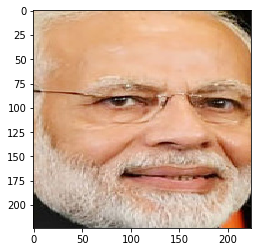

In [5]:
#example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename,required_size = (224,224)):
    #load image from file
    pixels = pyplot.imread(filename)
    #create the detector using default weights
    detector = MTCNN()
    #detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width,height = results[0]['box']
    x2,y2 = x1+width , y1+height
    #extract the face
    face = pixels[y1:y2,x1:x2]
    #resize pixels to the model size
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

#load the photo and extract the face
pixels = extract_face('Shri_Narendra_Modi.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

# Perform Face Identification With VGGFace2

### DataSet

MS-Celeb-1M dataset (listed in this CSV file).
link address:https://www.microsoft.com/en-us/research/project/ms-celeb-1m-challenge-recognizing-one-million-celebrities-real-world/
http://www.robots.ox.ac.uk/~vgg/data/vgg_face2/meta/identity_meta.csv

In [7]:
# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('Shri_Narendra_Modi.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Narendra_Modi': 90.007%
b' Sushil_Koirala': 2.176%
b' Ismail_Haniyeh': 2.105%
b' Ali_Akbar_Salehi': 0.491%
b' Yona_Metzger': 0.408%


#### We can test the model with another celebrity,A Photograph of Amitabh Bachachan available on Wikipedia

In [8]:
# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('Amit_shah.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Amit_Shah': 97.137%
b' Hassan_Nasrallah': 0.417%
b' Ismail_Haniyeh': 0.126%
b' Gustavo_Madero_Mu\xc3\xb1oz': 0.059%
b' Sathyaraj': 0.056%


# Perform Face Verification With VGGFace2

In [9]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [extract_face(f) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

# define filenames
filenames = ['Shri_Narendra_Modi.jpg', 'Shri_Narendra_Modi2.jpg',
    'Shri_Narendra_Modi3.jpg', 'Amit_shah.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define sharon stone
sharon_id = embeddings[0]
# verify known photos of sharon
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
# verify known photos of other people
print('Negative Tests')
is_match(embeddings[0], embeddings[3])

Positive Tests
>face is a Match (0.224 <= 0.500)
>face is a Match (0.145 <= 0.500)
Negative Tests
>face is NOT a Match (0.523 > 0.500)
